import packages

In [1]:
#import packages
from importlib.resources import Package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# import custom Package
sys.path.append(os.path.abspath(os.path.join("../scripts")))
import data_loader
import ploting_utils
import hypothesis_test

In [2]:
df = pd.read_csv('../data/ABtwoCampaignEngView.csv')
df.head()

,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,1333639,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,730667,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,2069787,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,1692366,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,1384123,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


In [33]:
# df['date'] = df['date'].values.astype(dtype='datetime64[ms]')
df['date'].iloc[0]

'<built-in method date of Timestamp object at 0x7fc3aeb78f48>'

In [27]:
cr = df.groupby('experiment').agg({'yes':['sum','count']}).reset_index().yes
cr

,sum,count
0,10641.0,456356
1,82132.0,456356


In [31]:
print('conversion rate for control group {}'.format(cr['sum'].iloc[0]/cr['count'].iloc[0]))
print('conversion rate for exposed group {}'.format(
    cr['sum'].iloc[1]/cr['count'].iloc[1]))


conversion rate for control group 0.023317322441252005
conversion rate for exposed group 0.17997352943754438



# Plotting categorical variables


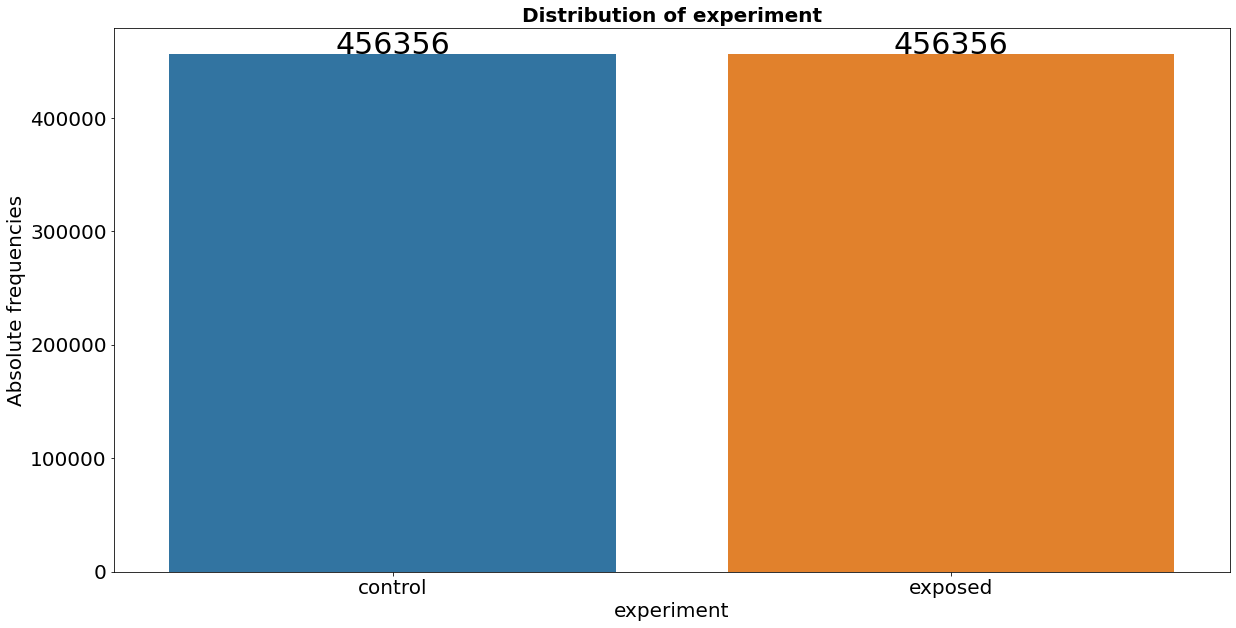

In [3]:
ploting_utils.plot_count(df, 'experiment')


The two groups (exposed and control) of users have exactly the same size.

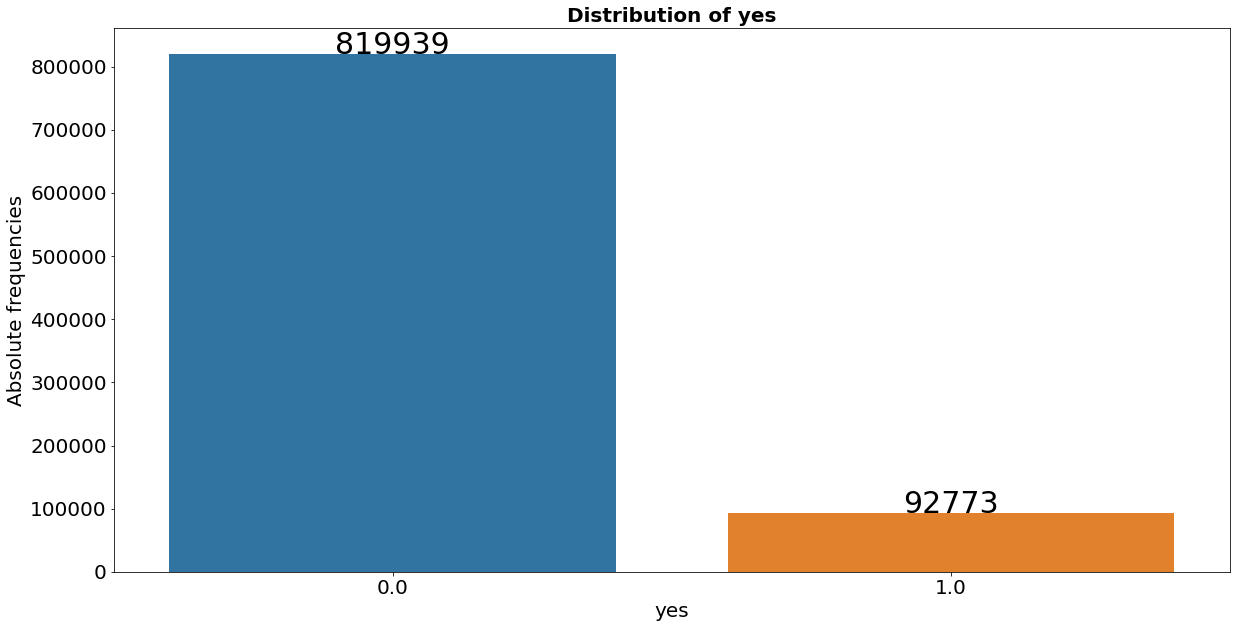

In [4]:
ploting_utils.plot_count(df, 'yes')


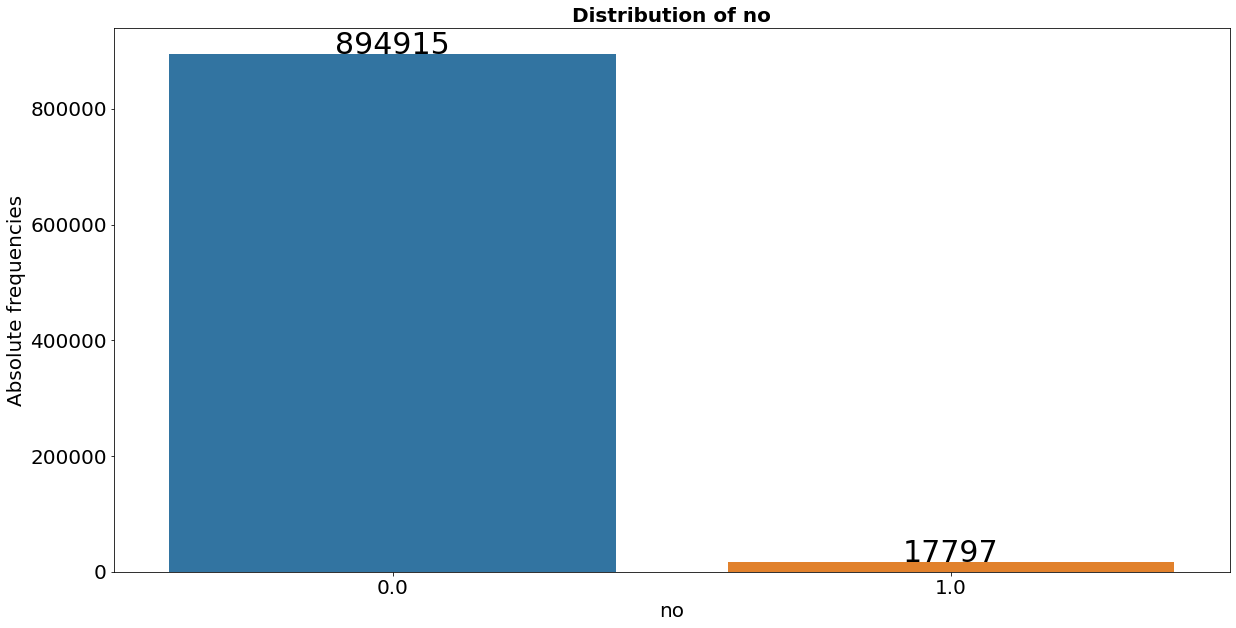

In [5]:
ploting_utils.plot_count(df, 'no')


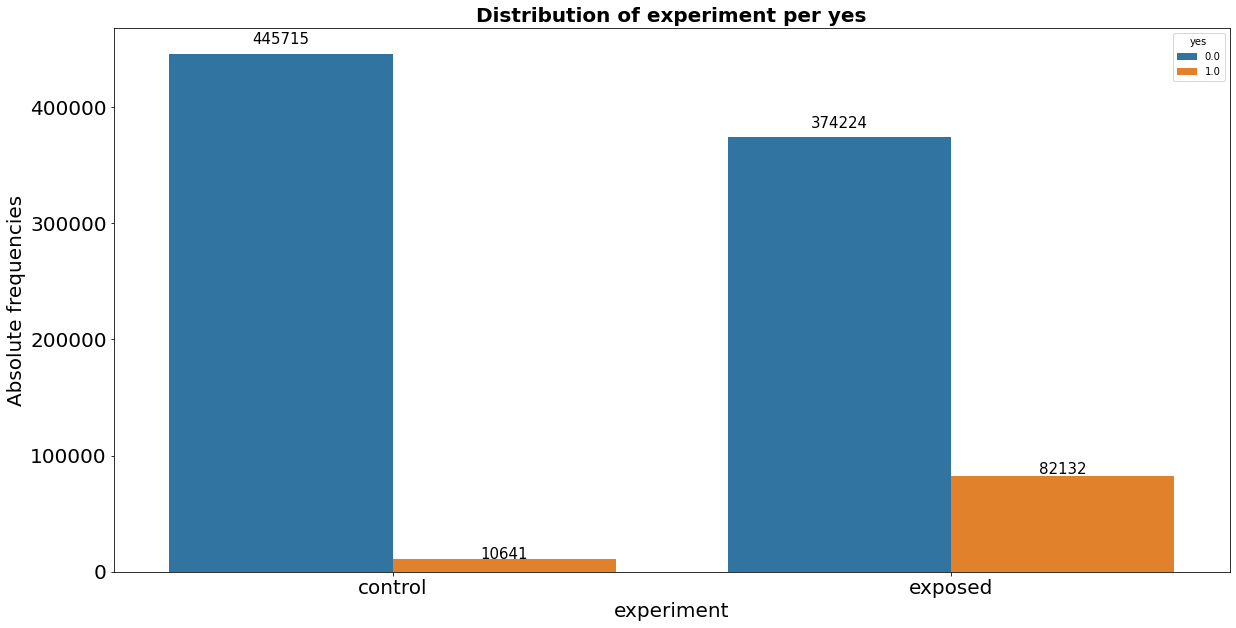

In [6]:
ploting_utils.multi_plot_count(df, 'experiment', 'yes')


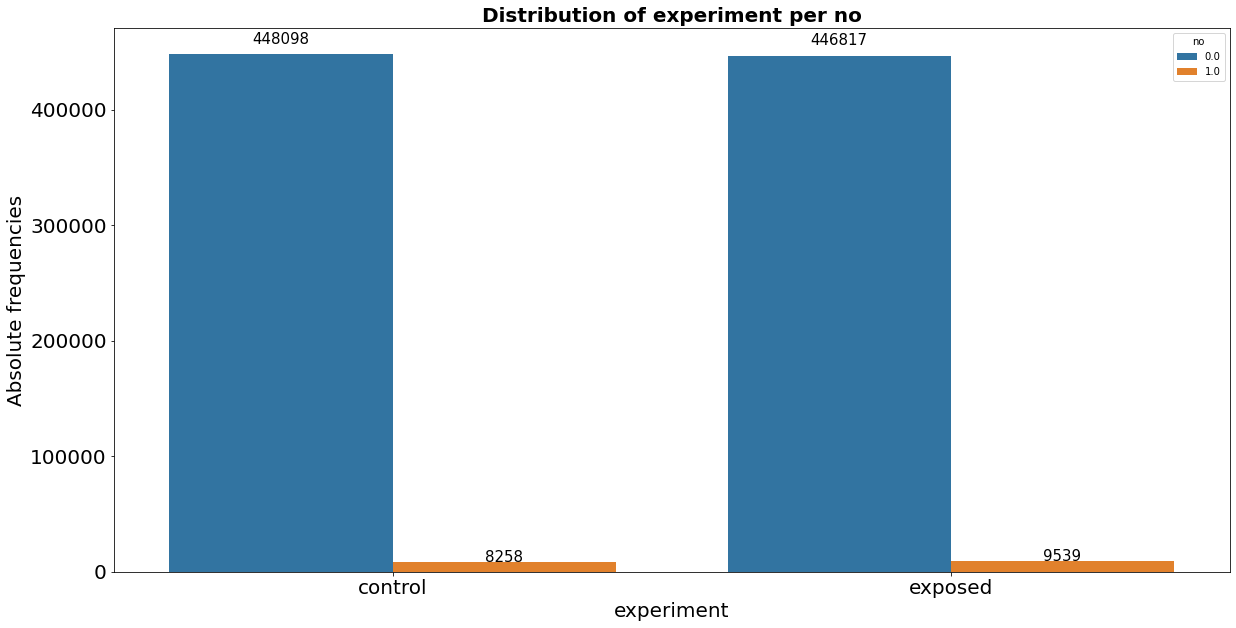

In [7]:
ploting_utils.multi_plot_count(df, 'experiment', 'no')


In [8]:
df['platform_os'].value_counts()


101    529469
162    118039
178     77651
156     48979
155     39381
        ...  
130         1
118         1
106         1
134         1
181         1
Name: platform_os, Length: 68, dtype: int64

In [9]:
df['browser'].value_counts()


6     427413
7     289305
15    191935
5       2715
12       870
1        310
8        153
14         7
10         4
Name: browser, dtype: int64

In [10]:
top_browsers = data_loader.top_values(df, 'browser', 5)
top_devices = data_loader.top_values(df, 'device_make', 5)
top_platforms = data_loader.top_values(df, 'platform_os', 2)


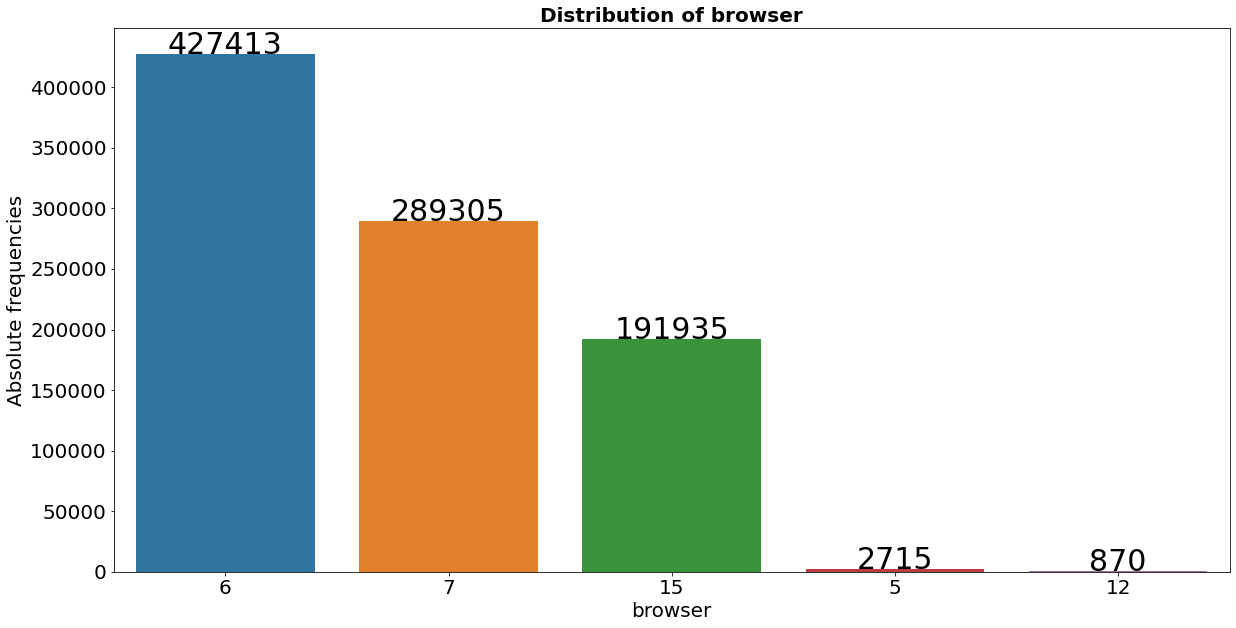

In [11]:
ploting_utils.plot_count(top_browsers, 'browser')


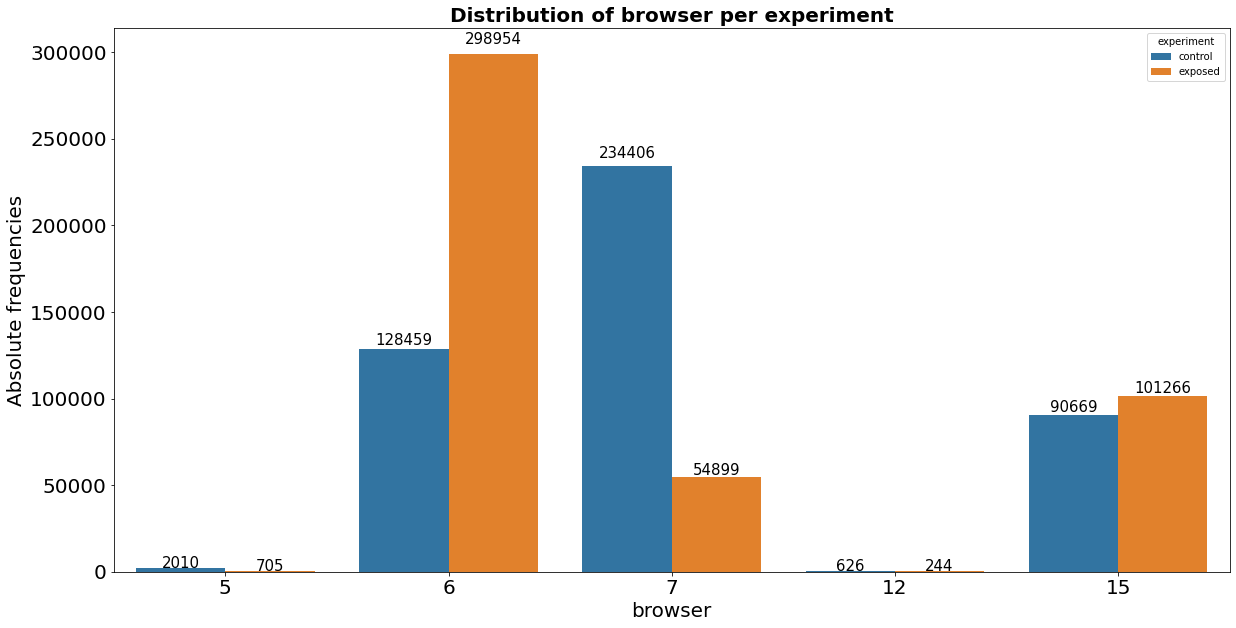

In [12]:
ploting_utils.multi_plot_count(top_browsers, 'browser', 'experiment')


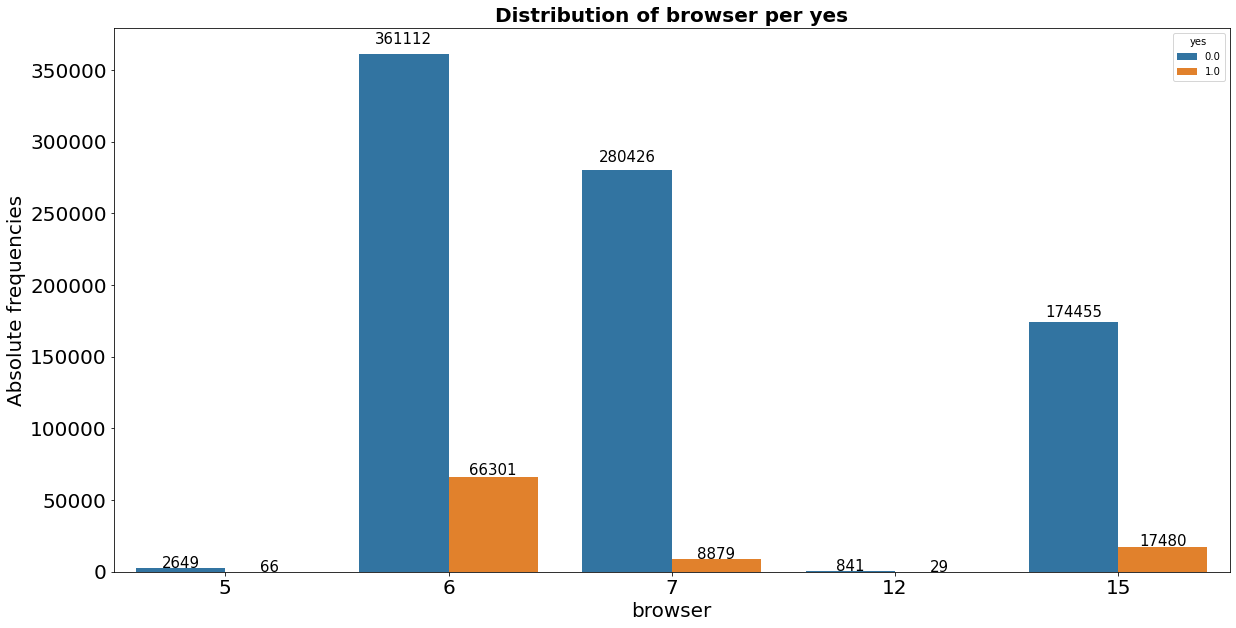

In [13]:
ploting_utils.multi_plot_count(top_browsers, 'browser', 'yes')


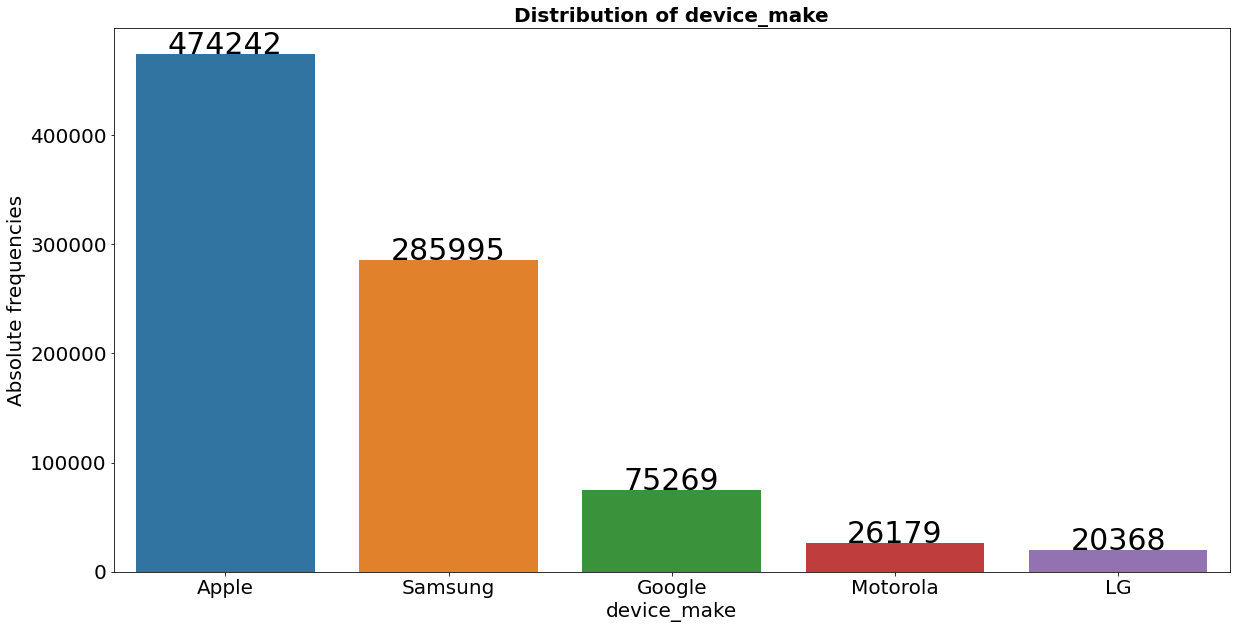

In [14]:
ploting_utils.plot_count(top_devices, 'device_make')


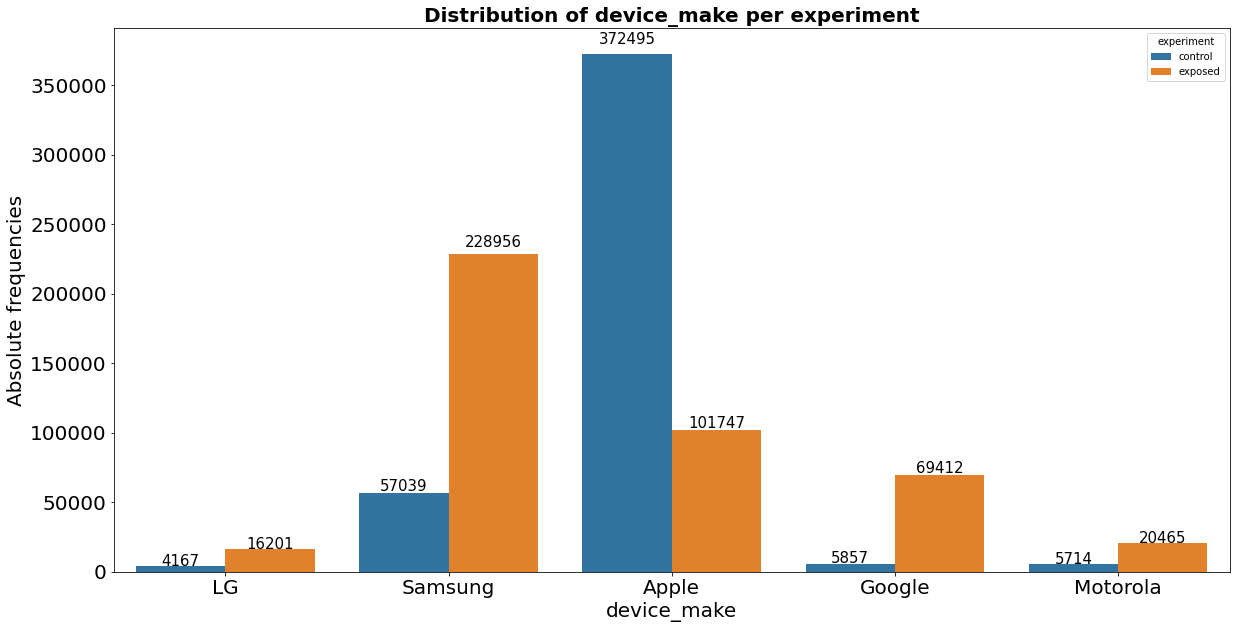

In [15]:
ploting_utils.multi_plot_count(top_devices, 'device_make', 'experiment')


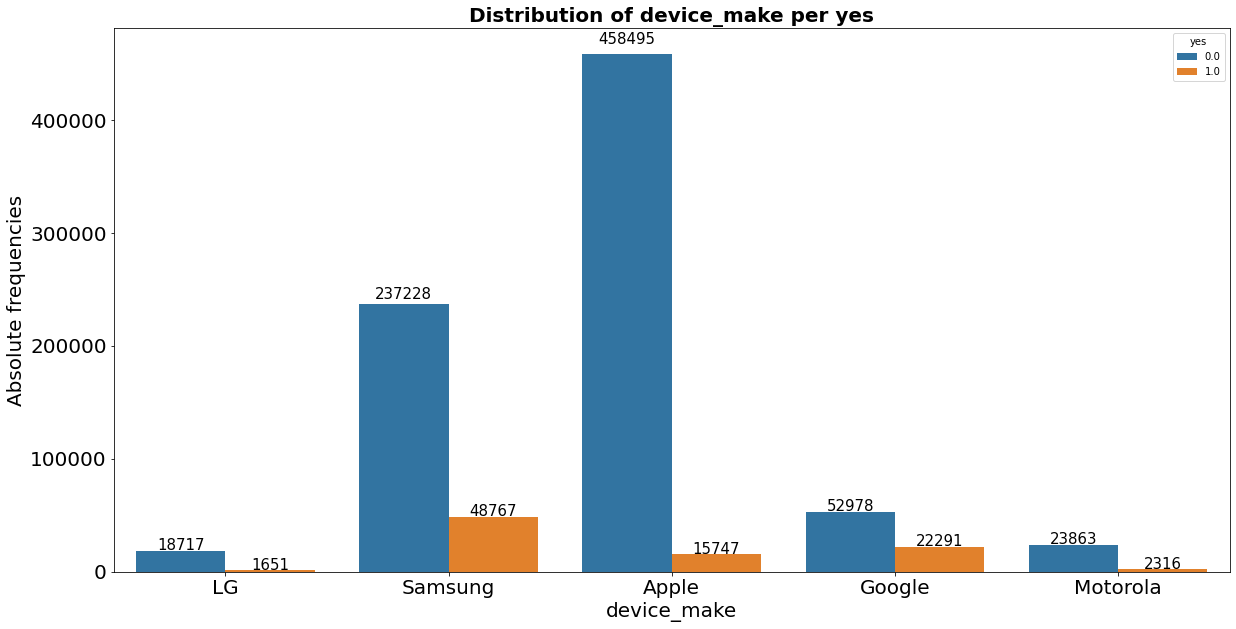

In [16]:
ploting_utils.multi_plot_count(top_devices, 'device_make', 'yes')


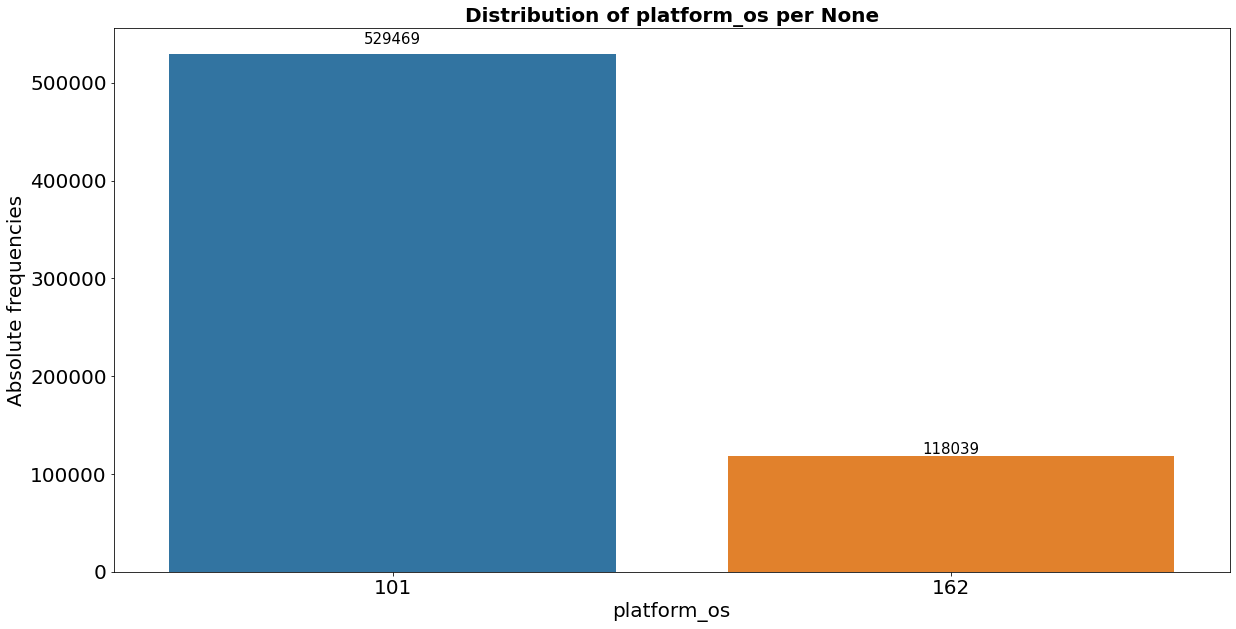

In [17]:
ploting_utils.multi_plot_count(top_platforms, 'platform_os', None)


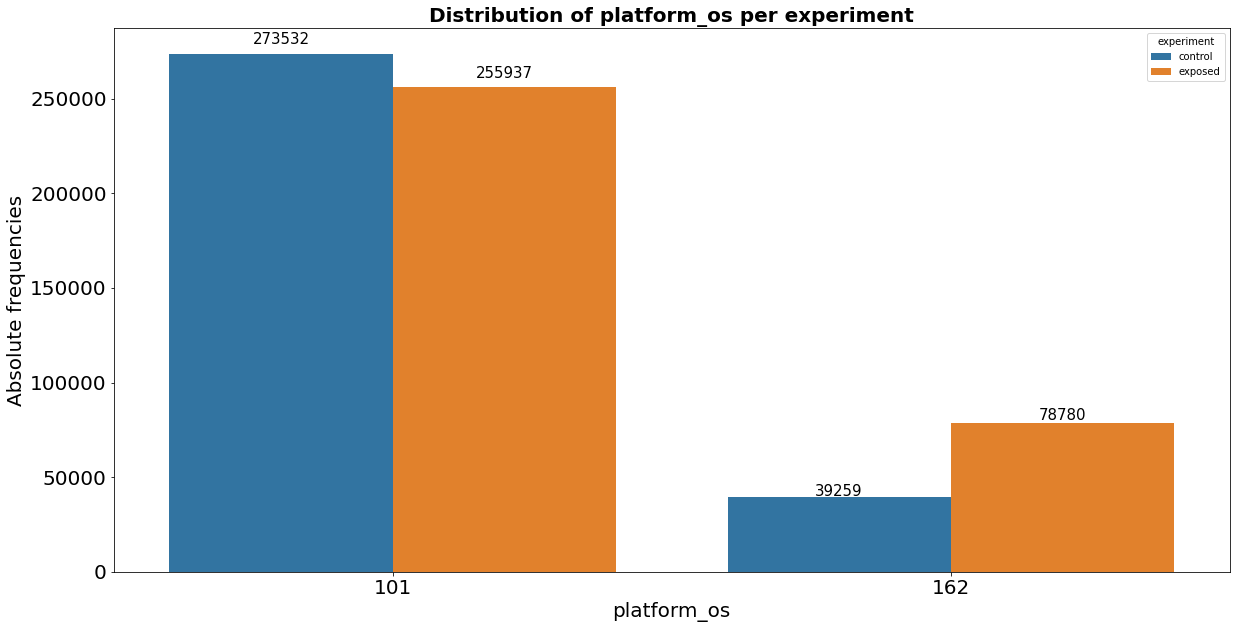

In [18]:
ploting_utils.multi_plot_count(top_platforms, 'platform_os', 'experiment')


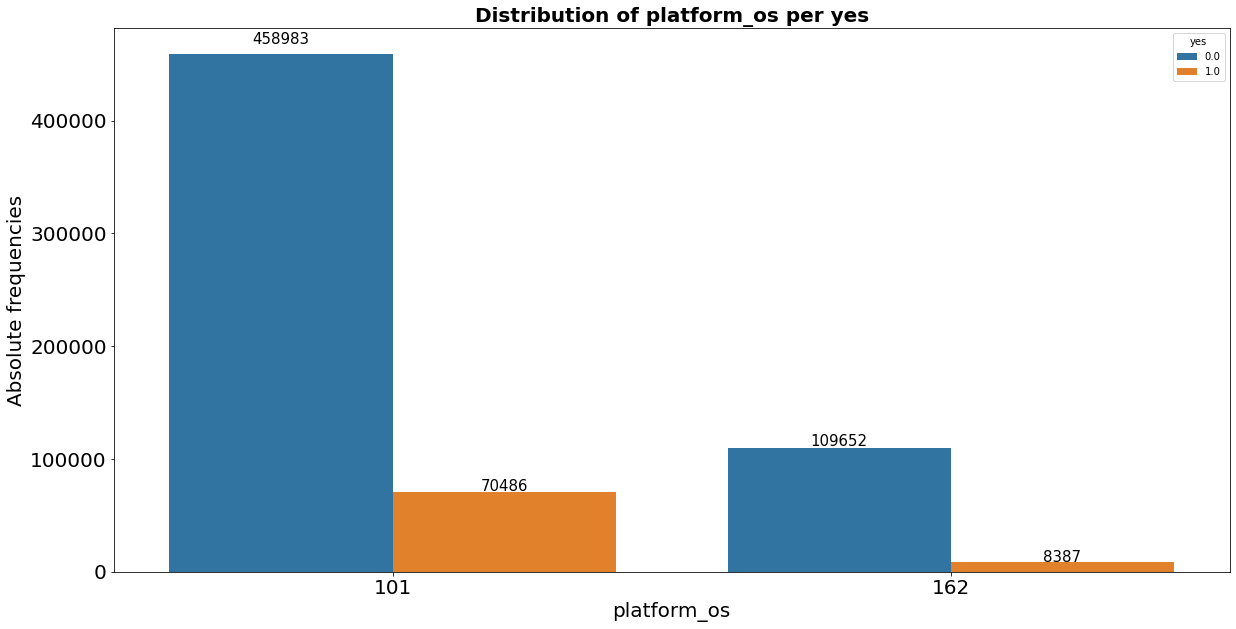

In [19]:
ploting_utils.multi_plot_count(top_platforms, 'platform_os', 'yes')
